# Practical Implementation of LSTM using Keras in Python

 ## Contents to be covered in this notebook:

 - LSTM Implementation
 - Visualize the results and convergence

 In this notebook we will predict the next number of series.

 For example:
#### Training Data
       X                Y
 ---------------     -------
- 1, 2, 3, 4, 5 =>>>>>>> 6
- 2, 3, 4, 5, 6 =>>>>>>> 7
- 3, 4, 5, 6, 7 =>>>>>>> 8
- 4, 5, 6, 7, 8 =>>>>>>> 9
----------------------------
#### Test Data
 X ............................................. Y
 ---------------------     -------
 - 10, 11, 12, 13, 14 =>>>>  ???
 - 11, 12, 13, 14, 15 =>>>>  ???
 - 12, 13, 14, 15, 16 =>>>>  ???

#### Import Important Libraries first

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


## Data preparation as discussed above in detail

In [0]:
# This code will generate the 100 vectors of 5 consecutive digits into variable name data
Data = [[[(i+j)/100] for i in range(5)] for j in range(100)] 
target = [(i+5)/100 for i in range(100)]

In [97]:
Data

[[[0.0], [0.01], [0.02], [0.03], [0.04]],
 [[0.01], [0.02], [0.03], [0.04], [0.05]],
 [[0.02], [0.03], [0.04], [0.05], [0.06]],
 [[0.03], [0.04], [0.05], [0.06], [0.07]],
 [[0.04], [0.05], [0.06], [0.07], [0.08]],
 [[0.05], [0.06], [0.07], [0.08], [0.09]],
 [[0.06], [0.07], [0.08], [0.09], [0.1]],
 [[0.07], [0.08], [0.09], [0.1], [0.11]],
 [[0.08], [0.09], [0.1], [0.11], [0.12]],
 [[0.09], [0.1], [0.11], [0.12], [0.13]],
 [[0.1], [0.11], [0.12], [0.13], [0.14]],
 [[0.11], [0.12], [0.13], [0.14], [0.15]],
 [[0.12], [0.13], [0.14], [0.15], [0.16]],
 [[0.13], [0.14], [0.15], [0.16], [0.17]],
 [[0.14], [0.15], [0.16], [0.17], [0.18]],
 [[0.15], [0.16], [0.17], [0.18], [0.19]],
 [[0.16], [0.17], [0.18], [0.19], [0.2]],
 [[0.17], [0.18], [0.19], [0.2], [0.21]],
 [[0.18], [0.19], [0.2], [0.21], [0.22]],
 [[0.19], [0.2], [0.21], [0.22], [0.23]],
 [[0.2], [0.21], [0.22], [0.23], [0.24]],
 [[0.21], [0.22], [0.23], [0.24], [0.25]],
 [[0.22], [0.23], [0.24], [0.25], [0.26]],
 [[0.23], [0.24], [0.2

In [98]:
target

[0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.94,
 0.95,
 0.96,
 0.97,
 0.98,
 0.99,
 1.0,
 1.01,
 1.02,
 1.03,
 1.04]

In [0]:
# Now convert both arrays into Numpy arrays
data = np.array(Data, dtype=float)
target = np.array(target, dtype=float)

In [100]:
data

array([[[0.  ],
        [0.01],
        [0.02],
        [0.03],
        [0.04]],

       [[0.01],
        [0.02],
        [0.03],
        [0.04],
        [0.05]],

       [[0.02],
        [0.03],
        [0.04],
        [0.05],
        [0.06]],

       [[0.03],
        [0.04],
        [0.05],
        [0.06],
        [0.07]],

       [[0.04],
        [0.05],
        [0.06],
        [0.07],
        [0.08]],

       [[0.05],
        [0.06],
        [0.07],
        [0.08],
        [0.09]],

       [[0.06],
        [0.07],
        [0.08],
        [0.09],
        [0.1 ]],

       [[0.07],
        [0.08],
        [0.09],
        [0.1 ],
        [0.11]],

       [[0.08],
        [0.09],
        [0.1 ],
        [0.11],
        [0.12]],

       [[0.09],
        [0.1 ],
        [0.11],
        [0.12],
        [0.13]],

       [[0.1 ],
        [0.11],
        [0.12],
        [0.13],
        [0.14]],

       [[0.11],
        [0.12],
        [0.13],
        [0.14],
        [0.15]],

       [[0.12],


In [101]:
target

array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15,
       0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26,
       0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37,
       0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48,
       0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59,
       0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 ,
       0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81,
       0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92,
       0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03,
       1.04])

In [0]:
# Now split the data into train_test for training and testing purpose
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state = 4)

In [0]:
#Now configure LSTM model
model=Sequential()

In [0]:
model.add(LSTM((1), batch_input_shape=(None, 5, 1), return_sequences = False))

In [0]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [106]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [115]:
history = model.fit(x_train, y_train, epochs=600, validation_data=(x_test, y_test))

Train on 80 samples, validate on 20 samples
Epoch 1/600
80/80 [==============================] - 0s 294us/step - loss: 0.0297 - accuracy: 0.0000e+00 - val_loss: 0.0288 - val_accuracy: 0.0500
Epoch 2/600
80/80 [==============================] - 0s 194us/step - loss: 0.0296 - accuracy: 0.0000e+00 - val_loss: 0.0288 - val_accuracy: 0.0500
Epoch 3/600
80/80 [==============================] - 0s 205us/step - loss: 0.0296 - accuracy: 0.0000e+00 - val_loss: 0.0289 - val_accuracy: 0.0500
Epoch 4/600
80/80 [==============================] - 0s 186us/step - loss: 0.0295 - accuracy: 0.0000e+00 - val_loss: 0.0289 - val_accuracy: 0.0500
Epoch 5/600
80/80 [==============================] - 0s 201us/step - loss: 0.0295 - accuracy: 0.0000e+00 - val_loss: 0.0289 - val_accuracy: 0.0500
Epoch 6/600
80/80 [==============================] - 0s 180us/step - loss: 0.0295 - accuracy: 0.0000e+00 - val_loss: 0.0291 - val_accuracy: 0.0500
Epoch 7/600
80/80 [==============================] - 0s 179us/step - loss:

In [0]:
results = model.predict(x_test)

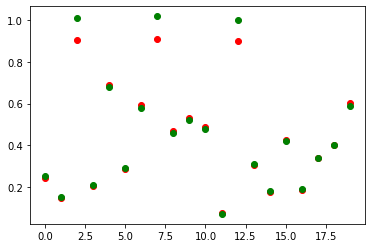

In [117]:
plt.scatter(range(20), results, c='r')
plt.scatter(range(20), y_test, c='g')
plt.show()

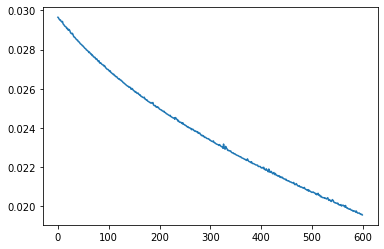

In [118]:
plt.plot(history.history['loss'])
plt.show()